# SUSPICIOUSSSSS... {ಠʖಠ}

In [1]:
#################################################
#################### IMPORTS ####################
#################################################

# ---------------- #
# Common Libraries #
# ---------------- #

# Standard Imports
import numpy as np
import pandas as pd
import seaborn as sns

# -------------- #
# Action Imports #
# -------------- #

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# ------------- #
# Local Imports #
# ------------- #

# importing sys
import sys

# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')

# env containing sensitive access credentials
import env
from env import user, password, host

# Time Series Anomaly Detection Exercises
- file name: `time_series_anomaly_detection.py` or `time_series_anomaly_detection.ipynb`

The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

**Hint**: You will need to explore the database (yay SQL!)

## Acquire

In [2]:
# Assign my url and query
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = """
SELECT * FROM logs
LEFT JOIN cohorts 
ON logs.cohort_id = cohorts.id;
"""
# Read in SQL
df = pd.read_sql(query, url)
df.T

,0,1,2,3,4,5,6,7,8,9,...,900213,900214,900215,900216,900217,900218,900219,900220,900221,900222
date,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,...,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21
time,09:55:03,09:56:02,09:56:05,09:56:06,09:56:24,09:56:41,09:56:46,09:56:48,09:56:59,09:58:26,...,16:38:14,16:41:29,16:41:31,16:41:49,16:41:51,16:41:51,16:42:02,16:42:09,16:44:37,16:44:39
path,/,java-ii,java-ii/object-oriented-programming,slides/object_oriented_programming,javascript-i/conditionals,javascript-i/loops,javascript-i/conditionals,javascript-i/functions,javascript-i/loops,javascript-i/functions,...,java-iii/servlets,javascript-i,javascript-ii,jquery,javascript-i/bom-and-dom/dom,jquery/personal-site,jquery/mapbox-api,jquery/ajax/weather-map,anomaly-detection/discrete-probabilistic-methods,jquery/mapbox-api
user_id,1,1,1,1,2,2,3,3,2,4,...,834,64,64,64,875,64,64,64,744,64
cohort_id,8.0,8.0,8.0,8.0,22.0,22.0,22.0,22.0,22.0,22.0,...,134.0,28.0,28.0,28.0,135.0,28.0,28.0,28.0,28.0,28.0
ip,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,...,67.11.50.23,71.150.217.33,71.150.217.33,71.150.217.33,24.242.150.231,71.150.217.33,71.150.217.33,71.150.217.33,24.160.137.86,71.150.217.33
id,8.0,8.0,8.0,8.0,22.0,22.0,22.0,22.0,22.0,22.0,...,134.0,28.0,28.0,28.0,135.0,28.0,28.0,28.0,28.0,28.0
name,Hampton,Hampton,Hampton,Hampton,Teddy,Teddy,Teddy,Teddy,Teddy,Teddy,...,Luna,Staff,Staff,Staff,Marco,Staff,Staff,Staff,Staff,Staff
slack,#hampton,#hampton,#hampton,#hampton,#teddy,#teddy,#teddy,#teddy,#teddy,#teddy,...,#luna,#,#,#,#marco,#,#,#,#,#
start_date,2015-09-22,2015-09-22,2015-09-22,2015-09-22,2018-01-08,2018-01-08,2018-01-08,2018-01-08,2018-01-08,2018-01-08,...,2020-12-07,2014-02-04,2014-02-04,2014-02-04,2021-01-25,2014-02-04,2014-02-04,2014-02-04,2014-02-04,2014-02-04


In [12]:
# Count null program_id entries
df.program_id.isnull().sum()

52893

## Prepare

In [3]:
# List unique program_id entries
df.program_id.unique()

array([ 1.,  2., nan,  4.,  3.])

In [5]:
# Drop duplicate id id column
df = df.drop(columns='id')

In [15]:
# Assign Conditions and Values to build new Column based on program_id values

conditions = [df.program_id == 1.0, 
              df.program_id == 2.0, 
              df.program_id == 3.0, 
              df.program_id == 4.0, 
              df.program_id.isnull()]

values = ['PHP', 'Java', 'Data Science', 'Front End', 'Pending']

df['program'] = np.select(conditions, values)

In [16]:
# Show me
df.T

,0,1,2,3,4,5,6,7,8,9,...,900213,900214,900215,900216,900217,900218,900219,900220,900221,900222
date,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,...,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21
time,09:55:03,09:56:02,09:56:05,09:56:06,09:56:24,09:56:41,09:56:46,09:56:48,09:56:59,09:58:26,...,16:38:14,16:41:29,16:41:31,16:41:49,16:41:51,16:41:51,16:42:02,16:42:09,16:44:37,16:44:39
path,/,java-ii,java-ii/object-oriented-programming,slides/object_oriented_programming,javascript-i/conditionals,javascript-i/loops,javascript-i/conditionals,javascript-i/functions,javascript-i/loops,javascript-i/functions,...,java-iii/servlets,javascript-i,javascript-ii,jquery,javascript-i/bom-and-dom/dom,jquery/personal-site,jquery/mapbox-api,jquery/ajax/weather-map,anomaly-detection/discrete-probabilistic-methods,jquery/mapbox-api
user_id,1,1,1,1,2,2,3,3,2,4,...,834,64,64,64,875,64,64,64,744,64
cohort_id,8.0,8.0,8.0,8.0,22.0,22.0,22.0,22.0,22.0,22.0,...,134.0,28.0,28.0,28.0,135.0,28.0,28.0,28.0,28.0,28.0
ip,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,...,67.11.50.23,71.150.217.33,71.150.217.33,71.150.217.33,24.242.150.231,71.150.217.33,71.150.217.33,71.150.217.33,24.160.137.86,71.150.217.33
name,Hampton,Hampton,Hampton,Hampton,Teddy,Teddy,Teddy,Teddy,Teddy,Teddy,...,Luna,Staff,Staff,Staff,Marco,Staff,Staff,Staff,Staff,Staff
slack,#hampton,#hampton,#hampton,#hampton,#teddy,#teddy,#teddy,#teddy,#teddy,#teddy,...,#luna,#,#,#,#marco,#,#,#,#,#
start_date,2015-09-22,2015-09-22,2015-09-22,2015-09-22,2018-01-08,2018-01-08,2018-01-08,2018-01-08,2018-01-08,2018-01-08,...,2020-12-07,2014-02-04,2014-02-04,2014-02-04,2021-01-25,2014-02-04,2014-02-04,2014-02-04,2014-02-04,2014-02-04
end_date,2016-02-06,2016-02-06,2016-02-06,2016-02-06,2018-05-17,2018-05-17,2018-05-17,2018-05-17,2018-05-17,2018-05-17,...,2021-06-08,2014-02-04,2014-02-04,2014-02-04,2021-07-19,2014-02-04,2014-02-04,2014-02-04,2014-02-04,2014-02-04


In [17]:
# Check Work
df.program.unique()

array(['PHP', 'Java', 'Pending', 'Front End', 'Data Science'],
      dtype=object)

In [106]:
# show dtype and null stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   name        847330 non-null  object 
 7   slack       847330 non-null  object 
 8   start_date  847330 non-null  object 
 9   end_date    847330 non-null  object 
 10  created_at  847330 non-null  object 
 11  updated_at  847330 non-null  object 
 12  deleted_at  0 non-null       object 
 13  program_id  847330 non-null  float64
 14  program     900223 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 103.0+ MB


There are columns with Null

 0   date        900223 non-null  object   = NO NULL dtype (Change to datetime)
 1   time        900223 non-null  object   = NO NULL dtype (Change to datetime)
 2   path        900222 non-null  object   = 1 x null dtype ok
 4   cohort_id   847330 non-null  float64  = 52893 x null dtype ok 
 6   name        847330 non-null  object   = 52893 x null dtype ok
 7   slack       847330 non-null  object   = 52893 x null dtype ok
 8   start_date  847330 non-null  object   = 52893 x null dtype (Change to datetime)
 9   end_date    847330 non-null  object   = 52893 x null dtype (Change to datetime)
 10  created_at  847330 non-null  object   = 52893 x null dtype (Change to datetime)
 11  updated_at  847330 non-null  object   = 52893 x null dtype (Change to datetime)
 12  deleted_at  0 non-null       object   = ALL NULL           (drop column) 
 13  program_id  847330 non-null  float64  = 52893 x null dtype ok

In [107]:
# change dtype to datetime
df.date = pd.to_datetime(df.date) 
df.time = pd.to_datetime(df.time) 
df.start_date = pd.to_datetime(df.start_date) 
df.end_date = pd.to_datetime(df.end_date) 
df.created_at = pd.to_datetime(df.created_at) 
df.updated_at = pd.to_datetime(df.updated_at) 

In [109]:
# Drop all nan column
df = df.drop(columns='deleted_at')

In [110]:
# Check Work
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        900223 non-null  datetime64[ns]
 1   time        900223 non-null  datetime64[ns]
 2   path        900222 non-null  object        
 3   user_id     900223 non-null  int64         
 4   cohort_id   847330 non-null  float64       
 5   ip          900223 non-null  object        
 6   name        847330 non-null  object        
 7   slack       847330 non-null  object        
 8   start_date  847330 non-null  datetime64[ns]
 9   end_date    847330 non-null  datetime64[ns]
 10  created_at  847330 non-null  datetime64[ns]
 11  updated_at  847330 non-null  datetime64[ns]
 12  program_id  847330 non-null  float64       
 13  program     900223 non-null  object        
dtypes: datetime64[ns](6), float64(2), int64(1), object(5)
memory usage: 96.2+ MB


In [111]:
# Set index
df = df.set_index(df.date)

In [113]:
# Resample at a daily frequency of path using count() as the aggregation method
path = df['path'].resample('d').count()
path.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='date'>

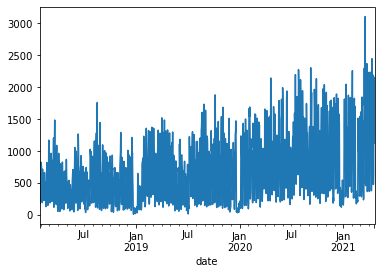

In [115]:
path.plot()

## Explore

In [18]:
# List uniques values for name
df.name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', None, 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Everglades',
       'Hyperion', 'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Easley', 'Marco', 'Neptune', 'Florence', 'Oberon'], dtype=object)

In [19]:
# List uniques values for slack
df.slack.unique()

array(['#hampton', '#teddy', '#sequoia', '#arches', '#niagara',
       '#pinnacles', '#quincy', None, '#kings', '#lassen', '#mammoth',
       '#glacier', '#denali', '#joshua', '#olympic', '#ulysses',
       '#badlands', '#apollo', '#ike', '#voyageurs', '#wrangell',
       '#xanadu', '#franklin', '#yosemite', '#', '#zion', '#andromeda',
       '#betelgeuse', '#ceres', '#deimos', '#europa', '#fortuna',
       '#curie', '#apex', '#ganymede', '#everglades', '#hyperion',
       '#darden', '#bash', '#jupiter', '#kalypso', '#luna', '#easley',
       '#marco', '#neptune', '#florence', '#oberon'], dtype=object)

In [20]:
# List uniques values for cohort_id
df.cohort_id.unique()

array([  8.,  22.,  21.,   1.,  16.,  18.,  19.,  nan,  13.,  14.,  15.,
         7.,   4.,  12.,  17.,  23.,   2.,   9.,  11.,  24.,  25.,  26.,
         6.,  27.,  28.,  29.,  31.,  32.,  33.,  34.,  51.,  52.,  53.,
        55.,  56.,  57.,   5.,  58.,  59.,  61.,  62., 132., 134., 133.,
       135., 138., 137., 139.])

In [21]:
df.path.unique()

array(['/', 'java-ii', 'java-ii/object-oriented-programming', ...,
       'florence-python-assessment.html', 'javascript-i/dom',
       'appendix/professional-development/post-interview-review-form'],
      dtype=object)

In [23]:
# Create DataFrame with entries that have no cohort_id
no_cohort = df[df.cohort_id.isnull()]
no_cohort.T

,411,412,425,435,436,437,438,439,440,441,...,899892,899893,899894,899895,899896,899897,899898,899899,899900,899902
date,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26,...,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21,2021-04-21
time,16:46:16,16:46:24,17:54:24,18:32:03,18:32:17,18:32:33,18:32:37,18:32:43,18:32:47,18:33:07,...,12:47:54,12:47:56,12:48:04,12:48:37,12:48:52,12:49:00,12:49:02,12:51:27,12:52:37,12:56:26
path,/,spring/extra-features/form-validation,/,/,mysql/relationships/joins,mysql/tables,mysql/databases,mysql/relationships,mysql/relationships/joins,mysql/relationships,...,javascript-i/bom-and-dom,javascript-i/bom-and-dom/bom,javascript-i/bom-and-dom/dom,javascript-i/bom-and-dom/dom-events,jquery,javascript-ii,javascript-ii/es6,javascript-ii/map-filter-reduce,javascript-ii/promises,javascript-ii/RESTful-api
user_id,48,48,48,48,48,48,48,48,48,48,...,717,717,717,717,717,717,717,717,717,717
cohort_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,...,136.50.102.126,136.50.102.126,136.50.102.126,136.50.102.126,136.50.102.126,136.50.102.126,136.50.102.126,136.50.102.126,136.50.102.126,136.50.102.126
name,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
slack,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
start_date,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
end_date,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [24]:
# List uniques values for no_cohort path
no_cohort.path.unique()

array(['/', 'spring/extra-features/form-validation',
       'mysql/relationships/joins', ...,
       'classification/classical_programming_vs_machine_learning.jpeg',
       'distributed-ml/explore',
       'appendix/further-reading/jquery/effects'], dtype=object)

In [29]:
# Count unique no_cohort user_id and List uniques values for no_cohort user_id
no_cohort.user_id.nunique(), no_cohort.user_id.unique()

(78,
 array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
         89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
        352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
        365, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544,  64, 713,
        714, 715, 716, 717, 718, 663, 719, 720, 721, 722, 723, 724, 725,
        726, 727, 728, 729, 346, 731, 736, 644, 744, 782, 810, 814, 815]))

## 1. Label students by the program they are in.

## ANSWER: 
* This was accomplished by adding the ```'program'``` column using the following values:
    * 1 - PHP
    * 2 - Java
    * 3 - Data Science
    * 4 - Front End
    * nan - Pending

```
# Assign Conditions and Values to build new Column based on program_id values

conditions = [df.program_id == 1.0, 
              df.program_id == 2.0, 
              df.program_id == 3.0, 
              df.program_id == 4.0, 
              df.program_id.isnull()]

values = ['PHP', 'Java', 'Data Science', 'Front End', 'Pending']

df['program'] = np.select(conditions, values)
```

## 2. Is it possible to identify the user_id of a staff member?

In [64]:
# List unique values for cohort name
df.name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', None, 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Everglades',
       'Hyperion', 'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Easley', 'Marco', 'Neptune', 'Florence', 'Oberon'], dtype=object)

## ANSWER: 
* Yes, the cohort ```'name'``` is equal to ```'staff'```

## 3. Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

In [66]:
# Create DataFrame for users that have accessed the curriculum past there graduation date
grad_users = df[df.date > df.end_date]

In [70]:
# Count the users
grad_users.user_id.nunique()

592

In [71]:
# Show the users
grad_users.user_id.unique()

array([  1,  11,  21,  26,  37,  40,  50,  51,  53,  60,  64,  66,  67,
        68,  69,  70,  71,  72,  75,  76,  77,  80,  81,  82,  83,  84,
        85,  87,  90,  91,  92,  93,  94,  95,  96,  97,  98, 101, 102,
        16,  42,  41,  17,  22,  15, 104,  47,  57,  10, 105, 106,  28,
       107,  65,  52,  33,  56, 108,  27,  38,  36, 109, 110, 112, 113,
       114, 115, 139, 140, 141, 143, 144, 146, 147, 148, 149, 150, 151,
       152, 153, 156, 161, 162, 163, 164, 165, 167, 168, 169, 170, 172,
       173, 174, 175, 177, 178, 179,  29,  19, 180,   6,  99,  43,  31,
         7, 181, 138,  35, 142,   5, 155, 154,  88, 209, 210,  18,   3,
        20, 118, 211, 212, 214, 216, 217, 131, 135, 128, 127, 124, 130,
       159,  12, 145, 241, 242, 136, 157, 171, 123,  25, 134, 119, 243,
       244, 245, 246, 160, 248, 252, 254, 255, 120, 257, 279, 280, 281,
        14, 253, 188, 186, 283, 184, 215, 278, 183, 204, 193, 195, 197,
       249, 206, 284, 121, 201, 285, 286, 311, 190, 312, 116, 20

In [69]:
# Count how many times each user accessed the curriculum
grad_users.user_id.value_counts()

11     17913
64     16297
53     12329
314     7783
1       7404
       ...  
325        1
593        1
533        1
592        1
163        1
Name: user_id, Length: 592, dtype: int64

In [97]:
# Look at curriculum by click count and student nunique
program_views = grad_users.groupby(['user_id'])['path'].agg(['count', 'nunique'])
program_views.sort_values(by='count', ascending=False).T

user_id,11,64,53,314,1,428,495,248,315,211,...,593,250,649,240,701,592,533,163,325,165
count,17913,16297,12329,7783,7404,5897,5125,5075,4300,4227,...,1,1,1,1,1,1,1,1,1,1
nunique,871,434,333,225,976,266,238,625,213,210,...,1,1,1,1,1,1,1,1,1,1


## 4. Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2. 

In [116]:
# set the window span
span = 30

# compute midband
midband = path.ewm(span=span).mean()

midband.head()

date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: path, dtype: float64

In [117]:
# compute exponential stdev
stdev = path.ewm(span=span).std()

stdev.head()

date
2018-01-26           NaN
2018-01-27    241.830519
2018-01-28    213.878138
2018-01-29    316.467837
2018-01-30    284.479727
Freq: D, Name: path, dtype: float64

In [118]:
# compute upper and lower bands setting k to 2 standard deviations
ub = midband + stdev*2
lb = midband - stdev*2
ub, lb

(date
 2018-01-26            NaN
 2018-01-27     878.961038
 2018-01-28     742.895854
 2018-01-29    1089.938060
 2018-01-30    1070.328518
                  ...     
 2021-04-17    2805.204187
 2021-04-18    2751.889069
 2021-04-19    2825.623313
 2021-04-20    2845.064711
 2021-04-21    2786.355225
 Freq: D, Name: path, Length: 1182, dtype: float64,
 date
 2018-01-26           NaN
 2018-01-27    -88.361038
 2018-01-28   -112.616698
 2018-01-29   -175.933288
 2018-01-30    -67.590389
                  ...    
 2021-04-17   -154.845956
 2021-04-18   -187.489435
 2021-04-19   -148.475267
 2021-04-20    -91.603636
 2021-04-21    -64.601316
 Freq: D, Name: path, Length: 1182, dtype: float64)

In [119]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
date,,
2018-01-26,NaN,NaN
2018-01-27,878.961038,-88.361038
2018-01-28,742.895854,-112.616698
2018-01-29,1089.938060,-175.933288
2018-01-30,1070.328518,-67.590389


In [120]:
daily_click_traffic = pd.concat([path, midband, bb], axis=1)
daily_click_traffic.columns = ['path', 'midband', 'ub', 'lb']
daily_click_traffic.T

date,2018-01-26,2018-01-27,2018-01-28,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-03,2018-02-04,...,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21
path,572.0,230.000000,170.000000,830.000000,652.000000,816.000000,767.000000,706.000000,249.000000,193.000000,...,2446.000000,1573.000000,1602.000000,2192.000000,1360.000000,478.000000,659.000000,2156.000000,1930.000000,1131.000000
midband,572.0,395.300000,315.139578,457.002386,501.369064,562.921651,598.218331,615.036143,562.710215,513.703032,...,1292.725268,1310.807509,1329.594121,1385.233210,1383.605261,1325.179115,1282.199817,1338.574023,1376.730537,1360.876954
ub,NaN,878.961038,742.895854,1089.938060,1070.328518,1133.034271,1136.108105,1111.323773,1093.757190,1072.122743,...,2873.639811,2846.276255,2821.818336,2891.491953,2840.519544,2805.204187,2751.889069,2825.623313,2845.064711,2786.355225
lb,NaN,-88.361038,-112.616698,-175.933288,-67.590389,-7.190969,60.328556,118.748512,31.663239,-44.716679,...,-288.189275,-224.661238,-162.630094,-121.025533,-73.309021,-154.845956,-187.489435,-148.475267,-91.603636,-64.601316


### Plot the bands

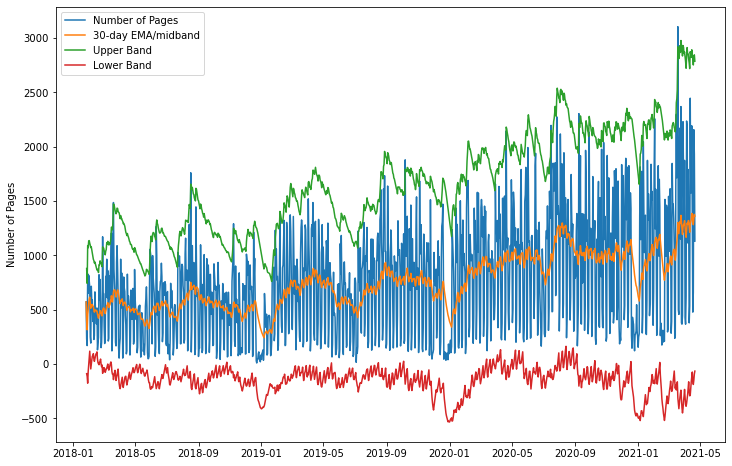

In [122]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(daily_click_traffic.index, daily_click_traffic.path, label='Number of Pages')

ax.plot(daily_click_traffic.index, daily_click_traffic.midband, label = '30-day EMA/midband')
ax.plot(daily_click_traffic.index, daily_click_traffic.ub, label = 'Upper Band')
ax.plot(daily_click_traffic.index, daily_click_traffic.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of Pages')

plt.show()

## 5. Plot the access activity of these students.

# **BONUS:** Can you identify users who are viewing both the web dev and data science curriculum?

## ANSWER:
* Find the unique list of path accessed by users with a program_id of 1,2, and 4 (WebDev)
* Find the unique list of path accessed by users with a program_id of 1,2, and 4 (Data Science)
* Find which path are the same between these two sets of program users

In [76]:
path_list = pd.DataFrame(df.path.unique().tolist())
path_list

,0
0,/
1,java-ii
2,java-ii/object-oriented-programming
3,slides/object_oriented_programming
4,javascript-i/conditionals
...,...
2309,appendix/further-reading/jquery/effects
2310,easley-python-assessment.html
2311,florence-python-assessment.html
2312,javascript-i/dom
